# CS672 Deep Learning Project #1

Aayushi Verma

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split

2023-10-27 20:02:27.415670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset

We are using the Wine dataset (https://archive.ics.uci.edu/dataset/109/wine) donated to UCI Machine Learning Repository. We will explore the characteristics of the dataset through exploratory data analysis and will create a deep learning model to train the dataset.

In [2]:
# defining df column names
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
# reading in csv
df = pd.read_csv('wine/wine.data', names = wine_names) 
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2             5.68  1.03         3.17     1185  
3             7.80  0.86         3.45     1480  
4             4.32  1.04         2.93      735

In [3]:
# checking data shape
df.shape

(178, 14)

In [4]:
# looking at basic statistics of data within dataset
df.describe()

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  OD280/OD315      Proline  
count       178.000000       178.000000  178.000000   178.000000   178.000000  
mean          1.590899         5.058090    0.957449     2.611685   746.893258  
std           0.572359         2.318286    0.228572     0.709990   314.907474  
min           0.410000         1.280000    0.480000     1.270000   278.000000  
25%           1.250000         3.220000    0.782500     1.937500   500.500000  
50%           1.555000         4.690000    0.965000     2.780000   673.500000  
75%           1.950000         6.200000    1.120000     3.170000   985.000000  
max           3.580000        13.000000    1.710000     4.000000  1680.000000

In [5]:
# getting info about df columns at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Exploratory Data Analysis

Prep the data in order to be ready to be fed to a model.
Look for missing, null, NaN records.
Find outliers.
Transform data – all entries should be numeric.

In [6]:
# double-checking for nulls
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [7]:
# finding columns in the df which have any null/na values
np.where(pd.isna(df))

(array([], dtype=int64), array([], dtype=int64))

So we have just triple-checked that there are no nulls, NA, or missing values in the dataframe - it is a very clean dataset - fantastic! Let's now look at the correlation between features.

In [8]:
# obtaining correlation matrix
corr = df.corr()
corr.style.background_gradient('coolwarm')

In [9]:
# sorting by highest correlations to our target variable, Class
corr['Class'].sort_values(ascending=False)

Class                   1.000000
Alcalinity of ash       0.517859
Nonflavanoid phenols    0.489109
Malic acid              0.437776
Color intensity         0.265668
Ash                    -0.049643
Magnesium              -0.209179
Alcohol                -0.328222
Proanthocyanins        -0.499130
Hue                    -0.617369
Proline                -0.633717
Total phenols          -0.719163
OD280/OD315            -0.788230
Flavanoids             -0.847498
Name: Class, dtype: float64

In [10]:
# defining function to plot boxplots of columns
def plot_boxplots_by_category(df, x_colname, y_colname):
    # x_colname must be numeric
    # y_colname must be the categorical value, which will automatically be converted to str
    sns.boxplot(x=df[x_colname], y=df[y_colname].apply(str), hue=df[y_colname])
    plt.title(f'Distribution of {x_colname} by {y_colname}')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.grid(alpha=0.2)
    plt.show()

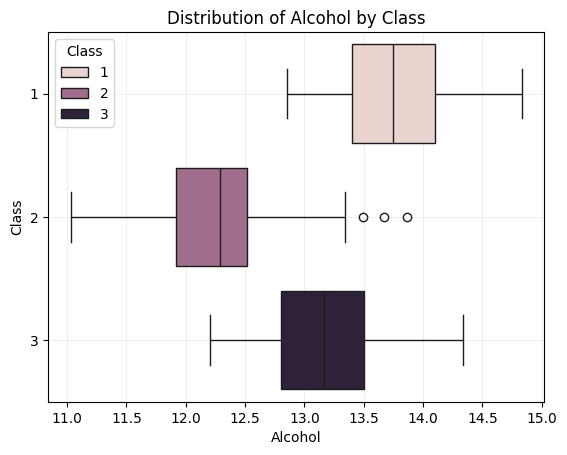

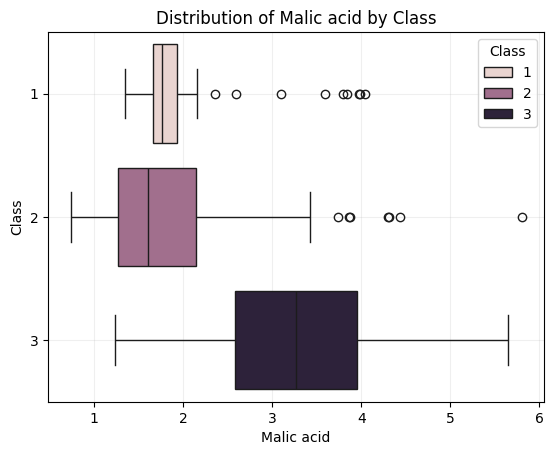

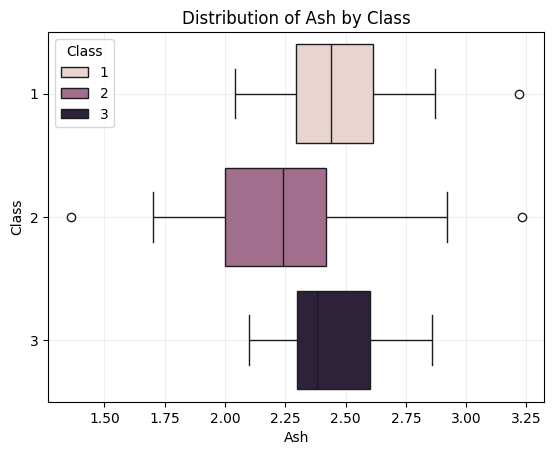

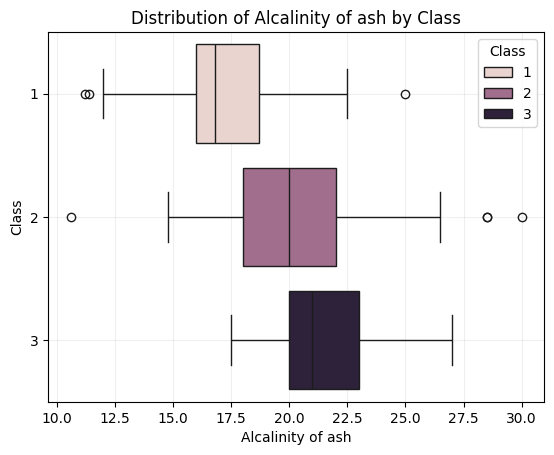

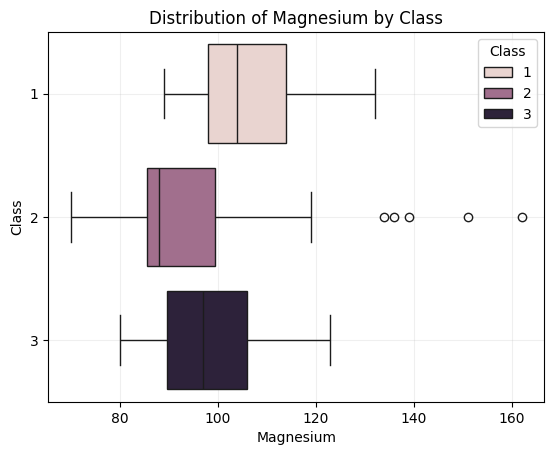

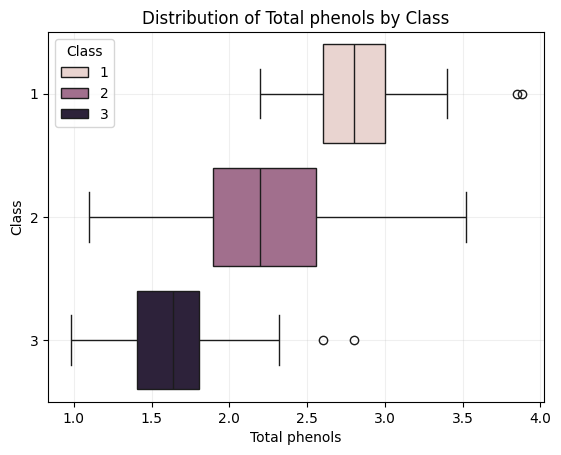

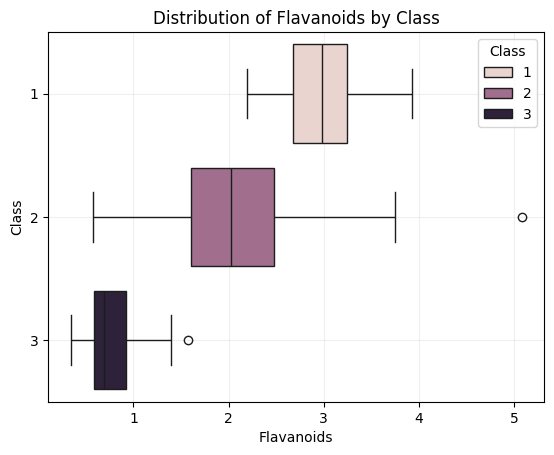

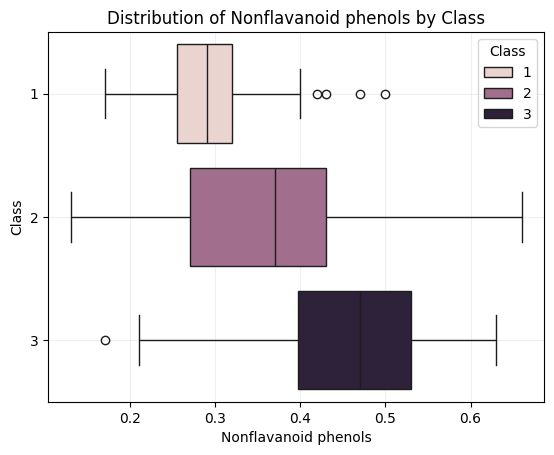

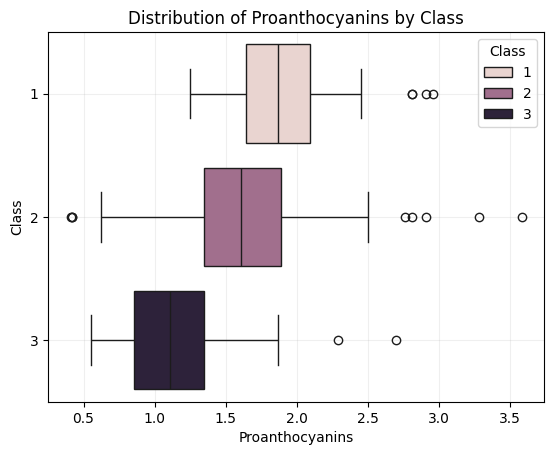

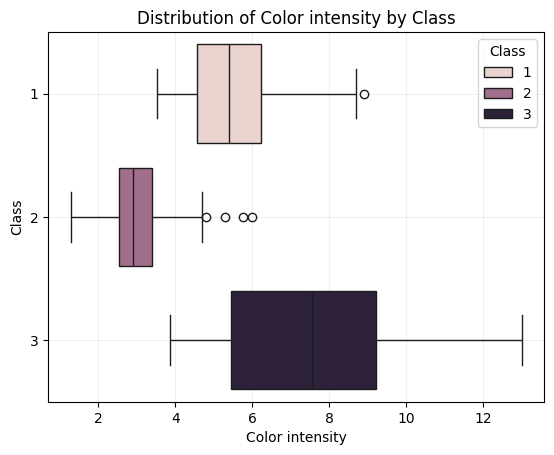

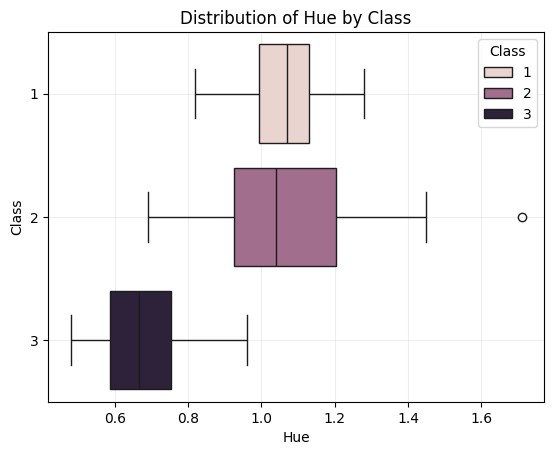

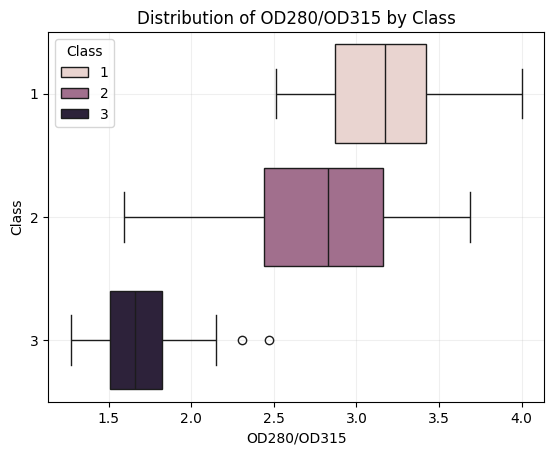

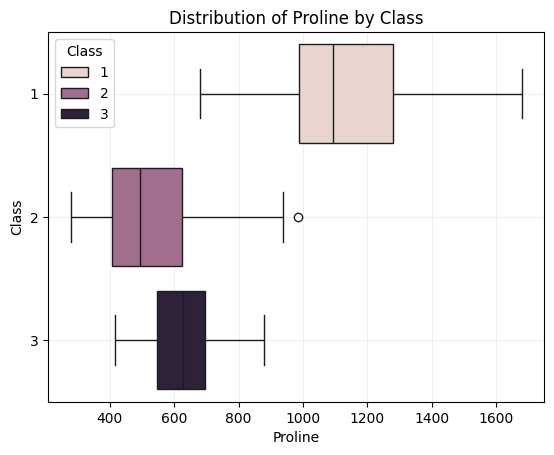

In [11]:
# plotting boxplots of data features
for col in df.columns[1:]:
    plot_boxplots_by_category(df, col, 'Class')

In [12]:
# defining function to plot violin plots of columns
def plot_violinplots_by_category(df, x_colname, y_colname):
    # x_colname must be numeric
    # y_colname must be the categorical value, which will automatically be converted to str
    sns.violinplot(x=df[x_colname], y=df[y_colname].apply(str), hue=df[y_colname])
    plt.title(f'Distribution of {x_colname} by {y_colname}')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.grid(alpha=0.2)
    plt.show()

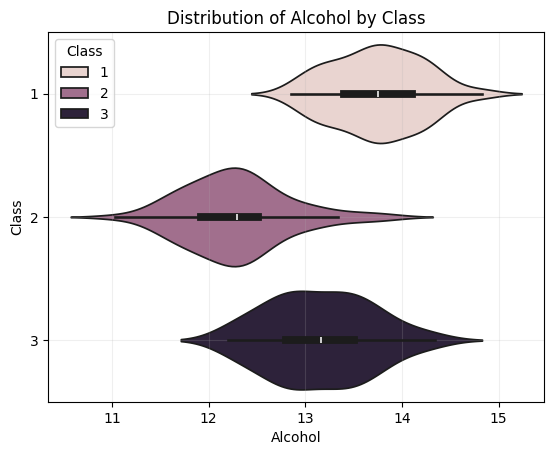

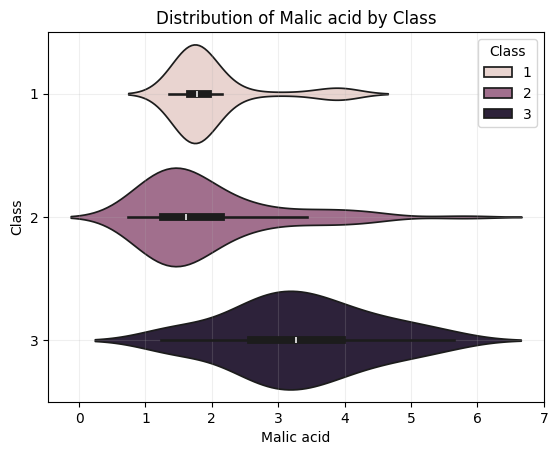

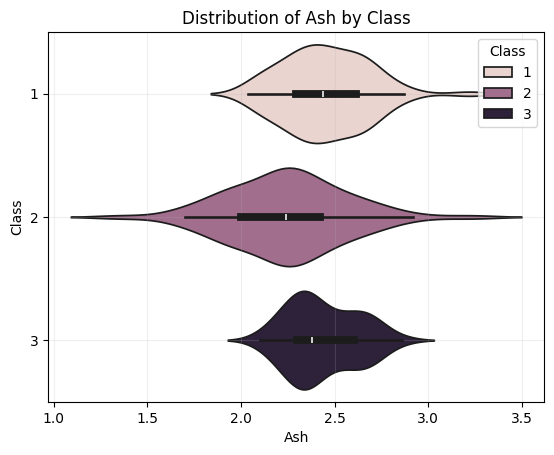

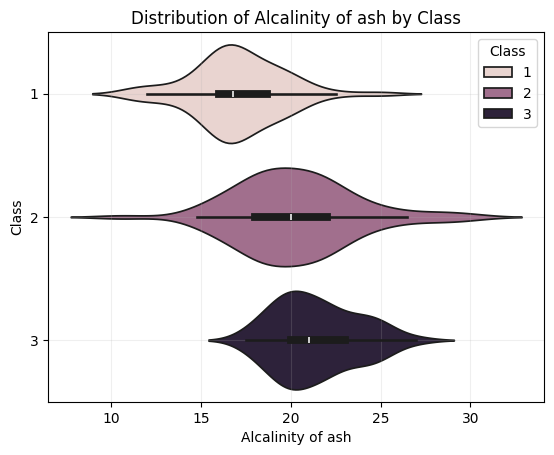

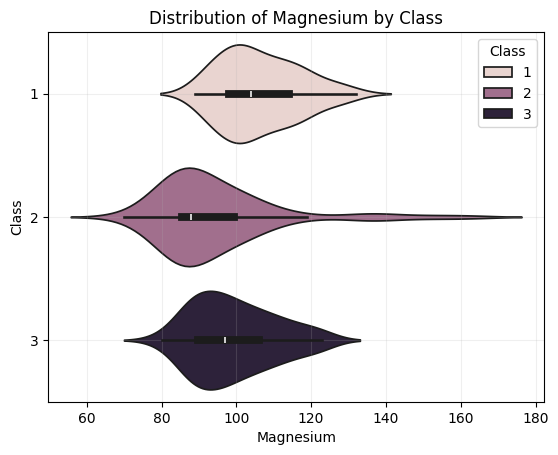

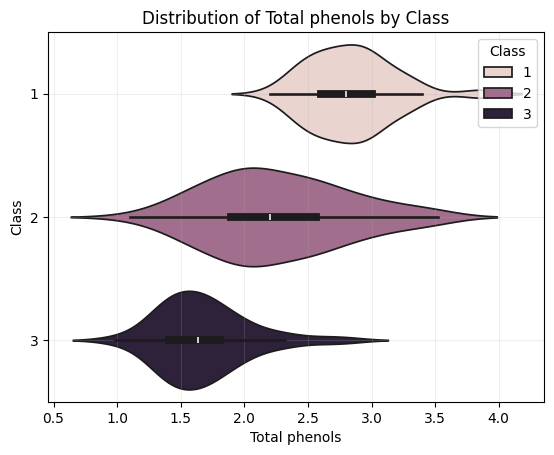

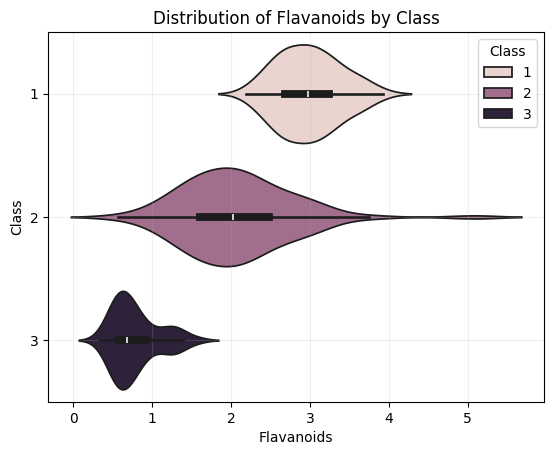

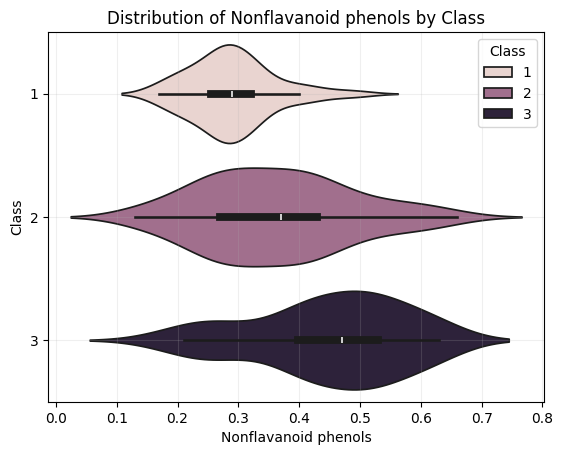

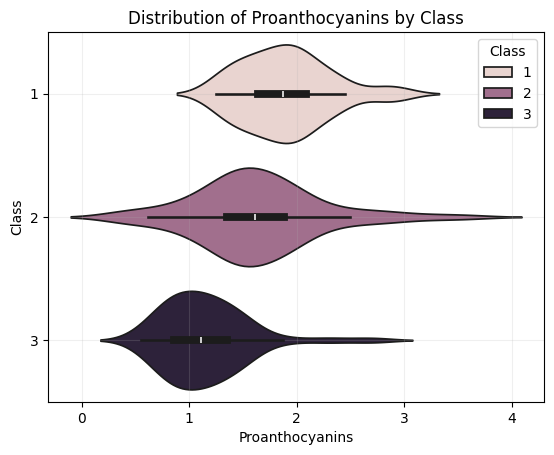

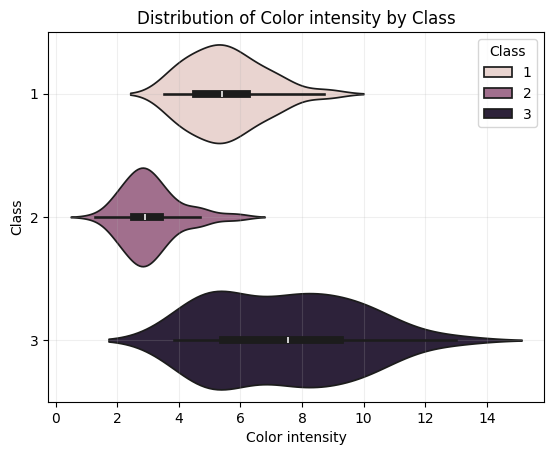

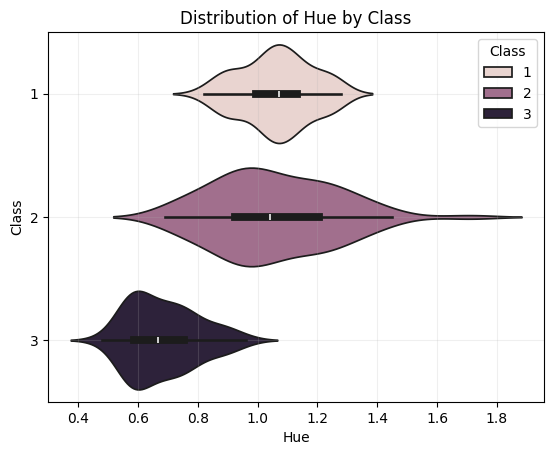

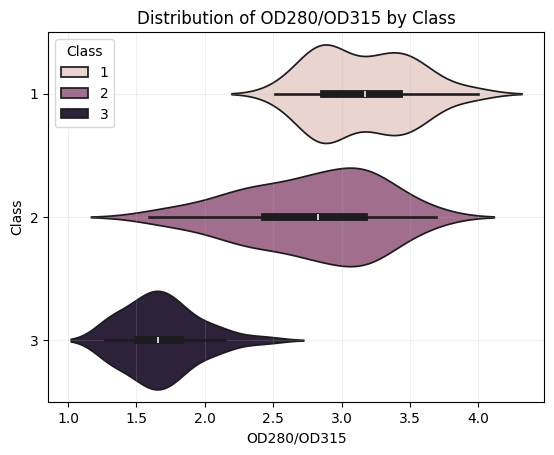

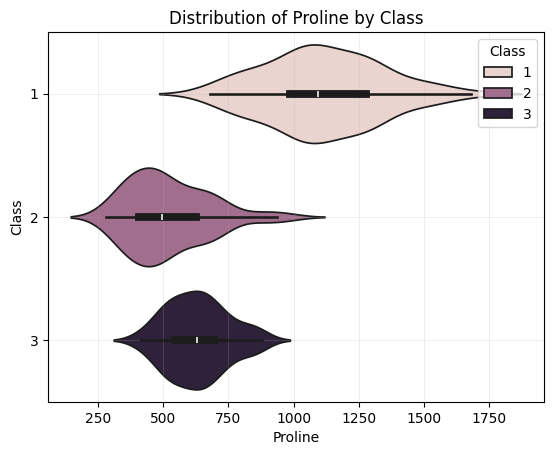

In [13]:
# plotting boxplots of data features
for col in df.columns[1:]:
    plot_violinplots_by_category(df, col, 'Class')

From both the boxplots and violin plots, the data does not seem to have any outrageously crazy outliers. Therefore I don't feel the need to scale, standardize, or normalize the data. We can leave it as-is.

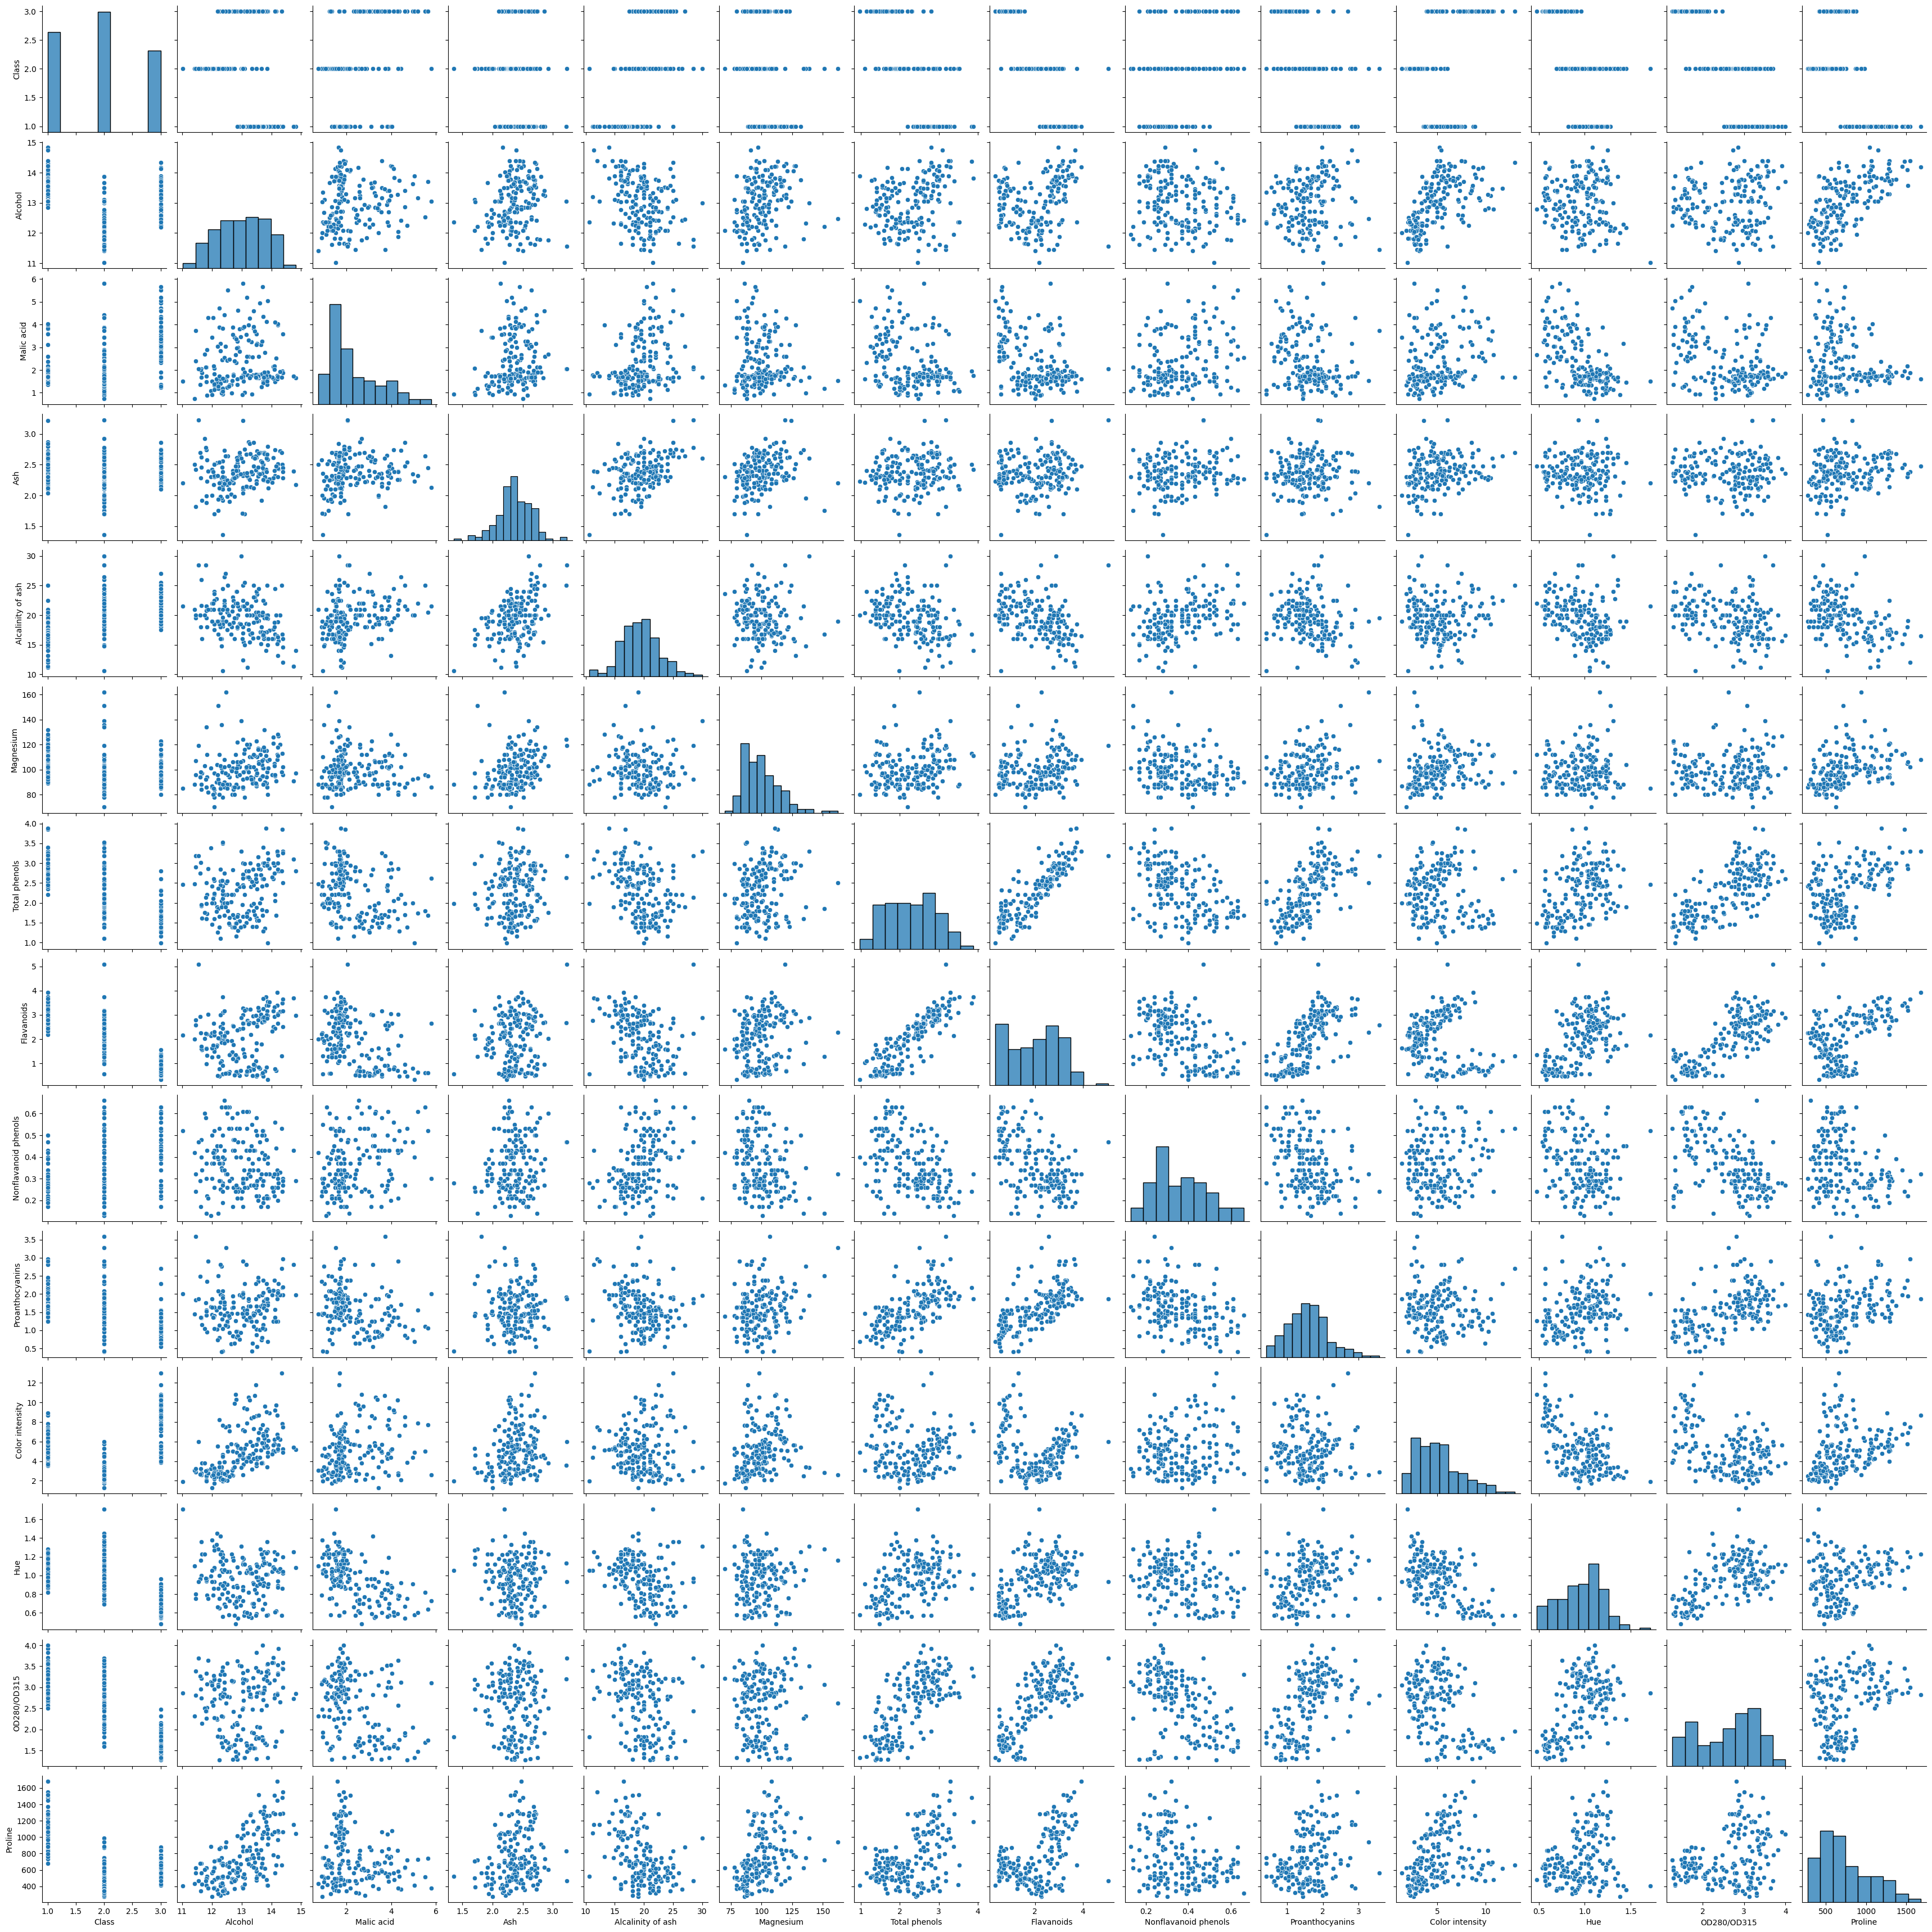

In [14]:
# final check of correlations through pairplot
sns.pairplot(df)

The data looks to be in pretty good shape. Let's go ahead and start building our neural network now!

## Models

Before building the model, we need to prepare our data first into a format that TensorFlow can ingest.

In [15]:
# checking df again
df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2             5.68  1.03         3.17     1185  
3             7.80  0.86         3.45     1480  
4             4.32  1.04         2.93      735

In [16]:
# defining feature columns and target column
feature_columns = df.columns[1:]
target_column = df.columns[0]

In [17]:
# creating X and Y arrays
X = df[feature_columns].values
y = df[target_column].values

In [18]:
# splitting data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
# converting data to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [20]:
# defining functions to minimize lines of code to call

def instantiate_model(hidden_activation): 
    """
    Function to instantiate the model with 2 hidden layers.

    Args:
        hidden_activation (str): Either 'relu' or 'sigmoid'.

    Returns:
        model: TensorFlow model object.
    """
    tf.random.set_seed(42)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation=hidden_activation), 
        tf.keras.layers.Dense(256, activation=hidden_activation), 
        tf.keras.layers.Dense(256, activation=hidden_activation),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ])
    return model

def compile_model(model, optimizer, learning_rate):
    """
    Function to compile the model and set evaluation metrics.

    Args:
        model (tf): TensorFlow model object.
        optimizer (str): Either 'adam' or 'sgd'.
        learning_rate (float): Learning rate of optimizer.
    """
    if optimizer == 'adam':
        model_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        model_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=model_optimizer,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.F1Score(name='f1-score')
    ]
)
    
def fit_model(model, X_train, y_train, epochs, batch_size):
    """
    Function to fit model to training data.

    Args:
        model (tf): TensorFlow model object.
        X_train (tf): TensorFlow data object.
        y_train (tf): TensorFlow data object.
        epochs (int): Number of epochs.
        batch_size (int): Number of batches to divide epochs into.

    Returns:
        history.history: Dictionary of stored metrics.
    """
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return history.history

def predict_model(model, X_val):
    """
    Function to predict model using validation data.

    Args:
        model (tf): TensorFlow model object.
        X_val (tf): TensorFlow data object.

    Returns:
        pred: Array of predictions.
    """
    pred = model.predict(X_val)
    return pred

def evaluate_model(model, X_test, y_test):
    """
    Function to evaluate model on test data.

    Args:
        model (tf): TensorFlow model object.
        X_test (tf): TensorFlow data object.
        y_test (tf): TensorFlow data object.

    Returns:
        eval: List of stored evalutions.
    """
    eval = model.evaluate(X_test, y_test)
    return eval

def plot_model_results(history, hyperparameters):
    """
    Function to plot numerous graphs.

    Args:
        history (dict): Dictionary of stored evaluation metrics.
        hyperparameters (list): List of hyperparameters.
    """
    epochs = range(len(history['loss']))

    fig = plt.figure(figsize=(15,5))
    (ax1, ax2, ax3) = fig.subplots(1,3)
    fig.suptitle(f'Epoch vs Training Metrics with hyperparameters {hyperparameters}')

    ax1.plot(epochs, history['loss'], label='loss')
    ax1.set_title('Epoch vs Loss Value')
    ax1.set(xlabel='Epoch #', ylabel='Loss Value')
    ax1.legend()

    ax2.plot(epochs, history['accuracy'], label='accuracy')
    ax2.plot(epochs, history['precision'], label='precision')
    ax2.plot(epochs, history['recall'], label='recall')
    ax2.plot(epochs, history['f1-score'], label='f1-score')
    ax2.set_title('Epoch vs Performance Metrics')
    ax2.set(xlabel='Epoch #', ylabel='Performance Metric Value')
    ax2.legend()

    ax3.plot(history['loss'], history['accuracy'], label='loss vs accuracy')
    ax3.set_title('Loss Value vs Accuracy')
    ax3.set(xlabel='Loss Value', ylabel='Accuracy')
    ax3.legend()

    plt.show()

def eval_model_results(model_results, hyperparameters, eval):
    """
    Function to append model results to a Pandas DataFrame.

    Args:
        model_results (pd.DataFrame): DataFrame of model results.
        hyperparameters (list): List of hyperparameters.
        eval (list): List of stored evalutions.

    Returns:
        model_results: DataFrame of model results.
    """
    model_results.loc[len(model_results)] = [
    hyperparameters[0],
    hyperparameters[1],
    hyperparameters[2],
    hyperparameters[3],
    hyperparameters[4],
    eval[0],
    eval[1],
    eval[2],
    eval[3]]

    return model_results

def pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results):
    """
    Function to set up pipeline of actions.

    Args:
        X_train (tf): TensorFlow data object.
        y_train (tf): TensorFlow data object.
        X_val (tf): TensorFlow data object.
        y_val (tf): TensorFlow data object.
        X_test (tf): TensorFlow data object.
        y_test (tf): TensorFlow data object.
        hyperparameters (list): List of hyperparameters.
        model_results (pd.DataFrame): DataFrame of model results.

    Returns:
        model_results: DataFrame of model results.
    """
    # setting hyperparameters
    hidden_activation, optimizer, learning_rate, epochs, batch_size = hyperparameters
    # running model pipeline steps
    model = instantiate_model(hidden_activation)
    compile_model(model, optimizer, learning_rate)
    history = fit_model(model, X_train, y_train, epochs, batch_size)
    # pred = predict_model(model, X_val)
    pred = predict_model(model, X_test)
    eval = evaluate_model(model, X_test, y_test)
    model_results = eval_model_results(model_results, hyperparameters, eval)
    plot_model_results(history, hyperparameters)
    return model_results

In [21]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["activation","optimizer","learning_rate","epochs","batch_size","loss","accuracy","precision","recall"]
model_results = pd.DataFrame(columns=column_names)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: -34273512.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: -1752423936.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: -19487909888.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: -113573068800.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: -424300085248.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: -1349040734208.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoc

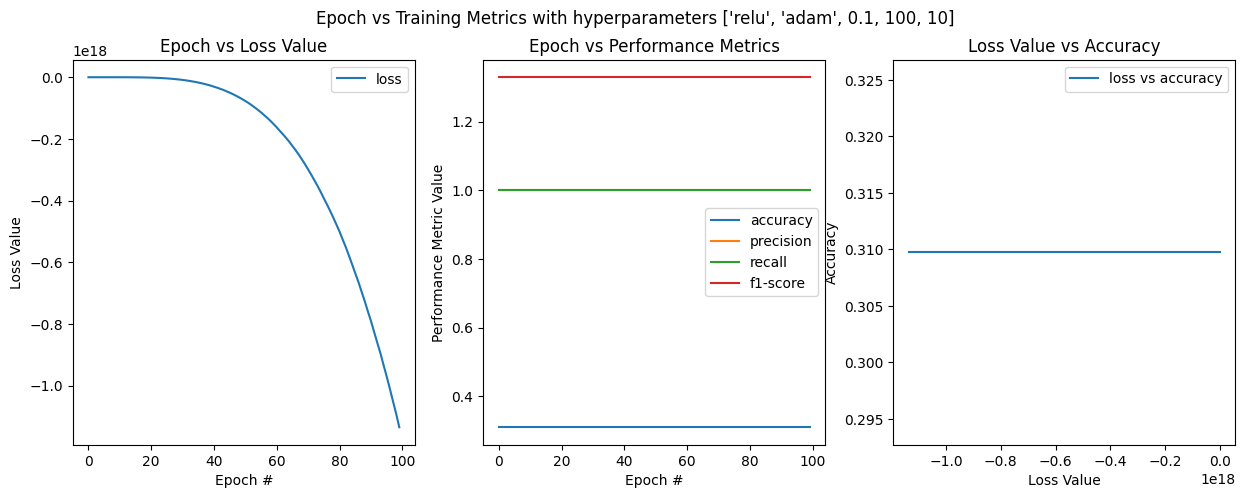

In [22]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['relu', 'adam', 0.1, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: -69.3722 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: -211.3278 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: -350.3477 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: -492.4561 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: -630.5858 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: -773.9385 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 7/100
12/12 [==============================] - 

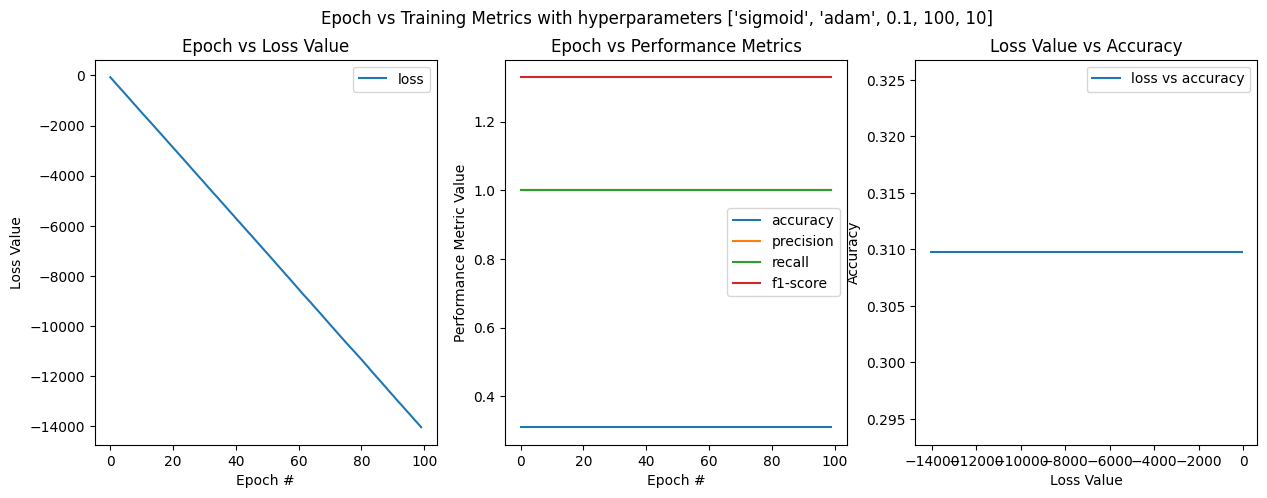

In [23]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['sigmoid', 'adam', 0.1, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0708 - precision: 1.0000 - recall: 0.2655 - f1-score: 0.4803
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 7/

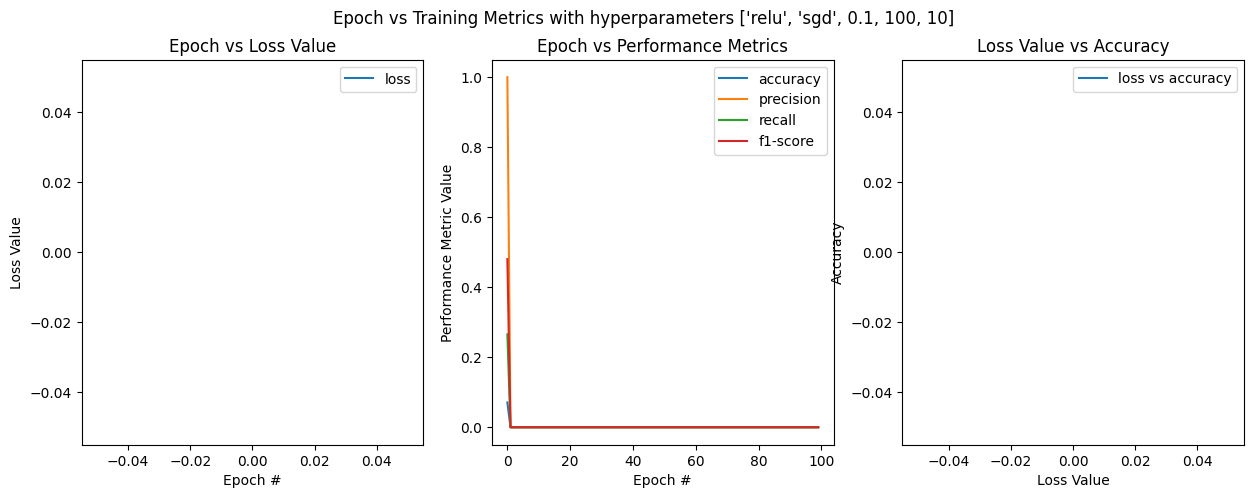

In [24]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['relu', 'sgd', 0.1, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: -70.9770 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: -350.0905 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: -642.2595 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: -945.3646 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: -1243.9264 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: -1535.4781 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 7/100
12/12 [==============================] 

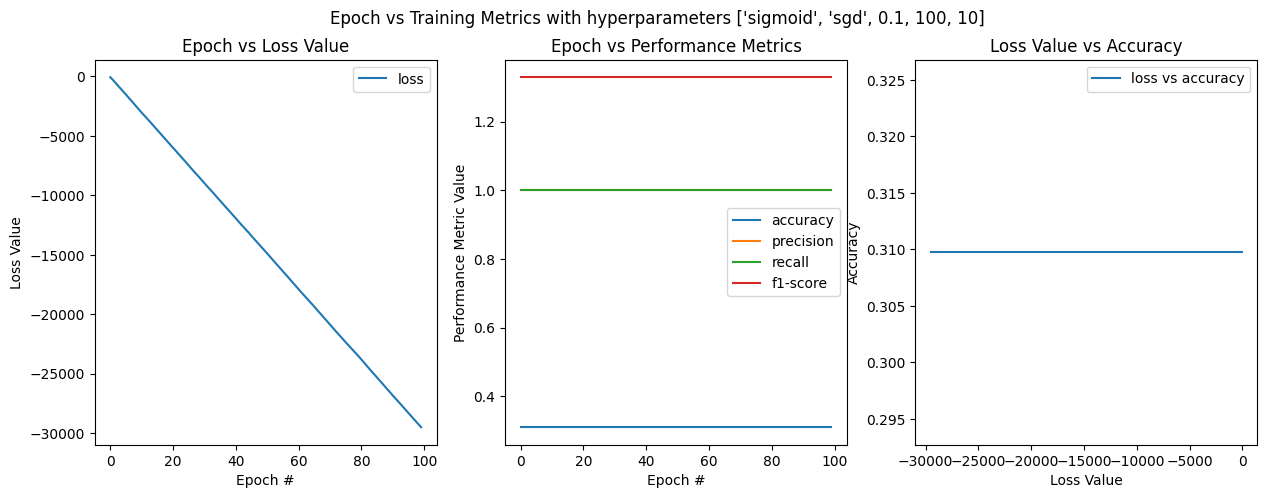

In [25]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['sigmoid', 'sgd', 0.1, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: -22956.4863 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: -557805.8125 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: -4372387.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: -21159016.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: -71059200.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: -209865600.0000 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 7/100
12/12 [========

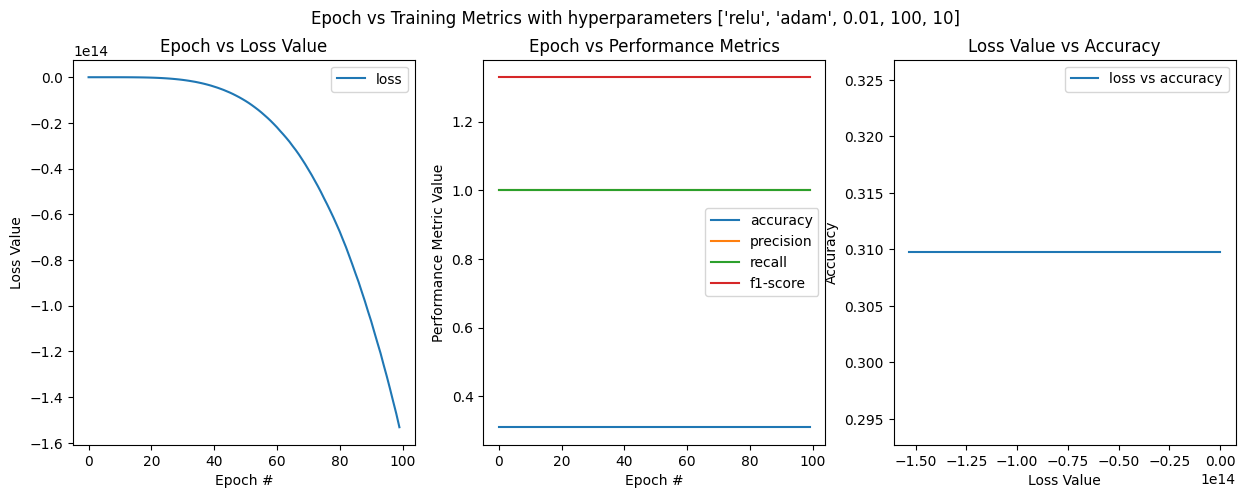

In [26]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['relu', 'adam', 0.01, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0973 - precision: 1.0000 - recall: 0.3540 - f1-score: 0.6136
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 7/

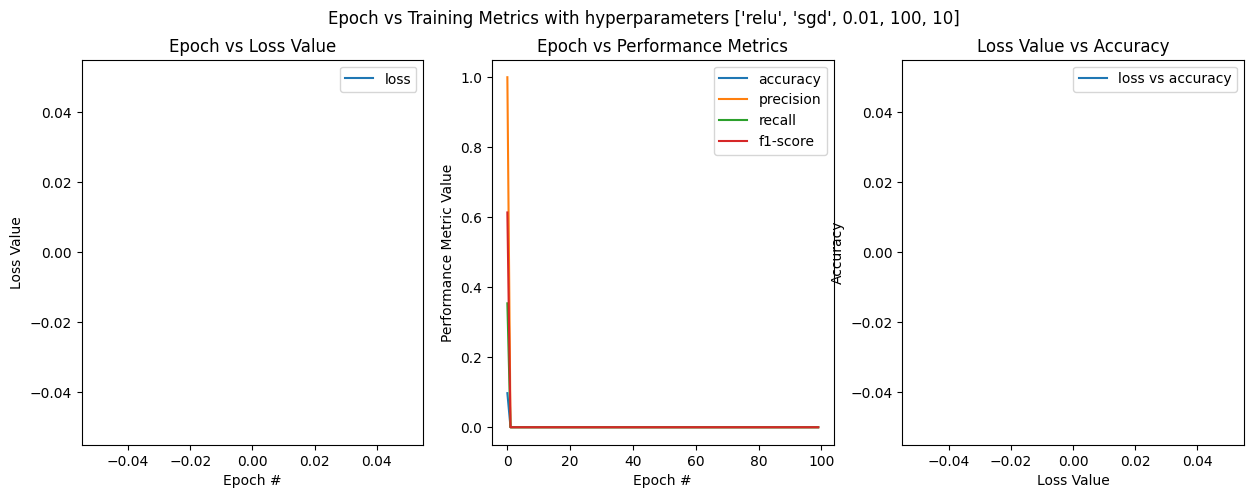

In [27]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['relu', 'sgd', 0.01, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: -315.0912 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: -1764.6448 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: -5799.8120 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: -16043.5254 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: -37169.9531 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: -81877.5547 - accuracy: 0.3097 - precision: 1.0000 - recall: 1.0000 - f1-score: 1.3294
Epoch 7/100
12/12 [=========================

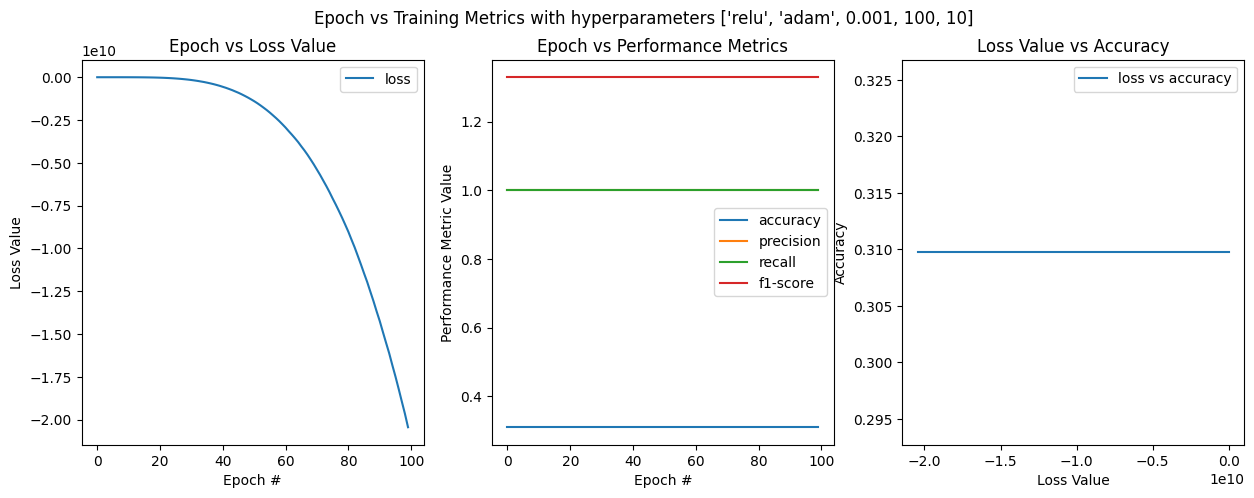

In [28]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['relu', 'adam', 0.001, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1327 - precision: 1.0000 - recall: 0.5310 - f1-score: 0.8732 
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1-score: 0.0000e+00
Epoch 7

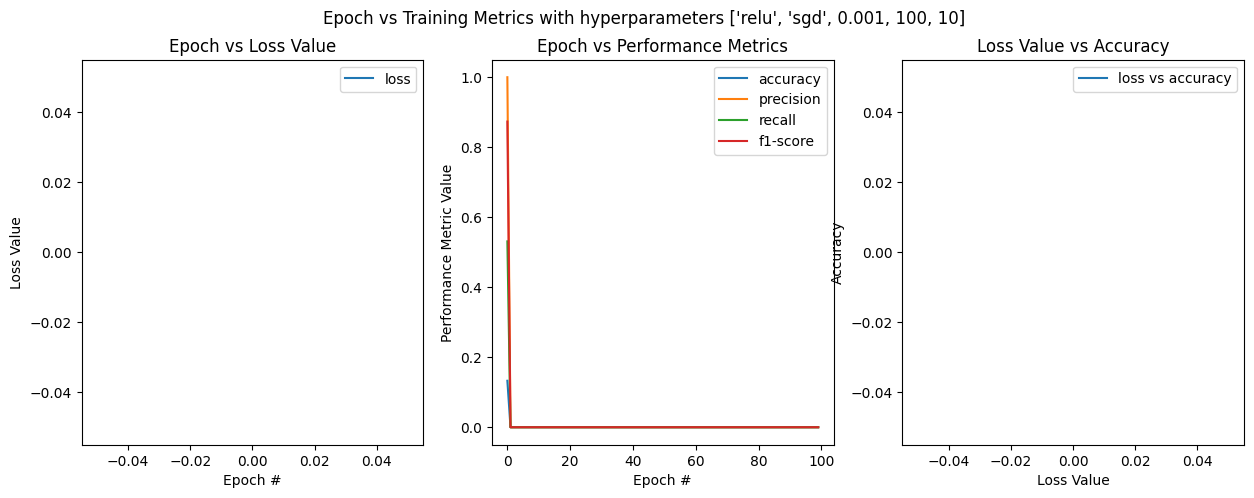

In [29]:
# activation, optimizer, learning_rate, epochs, batch_size
hyperparameters = ['relu', 'sgd', 0.001, 100, 10] 
model_results = pipeline(X_train, y_train, X_val, y_val, X_test, y_test, hyperparameters, model_results)

In [30]:
model_results

activation optimizer  learning_rate  epochs  batch_size          loss  \
0       relu      adam          0.100     100          10 -9.709313e+17   
1    sigmoid      adam          0.100     100          10 -1.197783e+04   
2       relu       sgd          0.100     100          10           NaN   
3    sigmoid       sgd          0.100     100          10 -2.518283e+04   
4       relu      adam          0.010     100          10 -1.310908e+14   
5       relu       sgd          0.010     100          10           NaN   
6       relu      adam          0.001     100          10 -1.749351e+10   
7       relu       sgd          0.001     100          10           NaN   

   accuracy  precision  recall  
0  0.388889        1.0     1.0  
1  0.388889        1.0     1.0  
2  0.000000        0.0     0.0  
3  0.388889        1.0     1.0  
4  0.388889        1.0     1.0  
5  0.000000        0.0     0.0  
6  0.388889        1.0     1.0  
7  0.000000        0.0     0.0

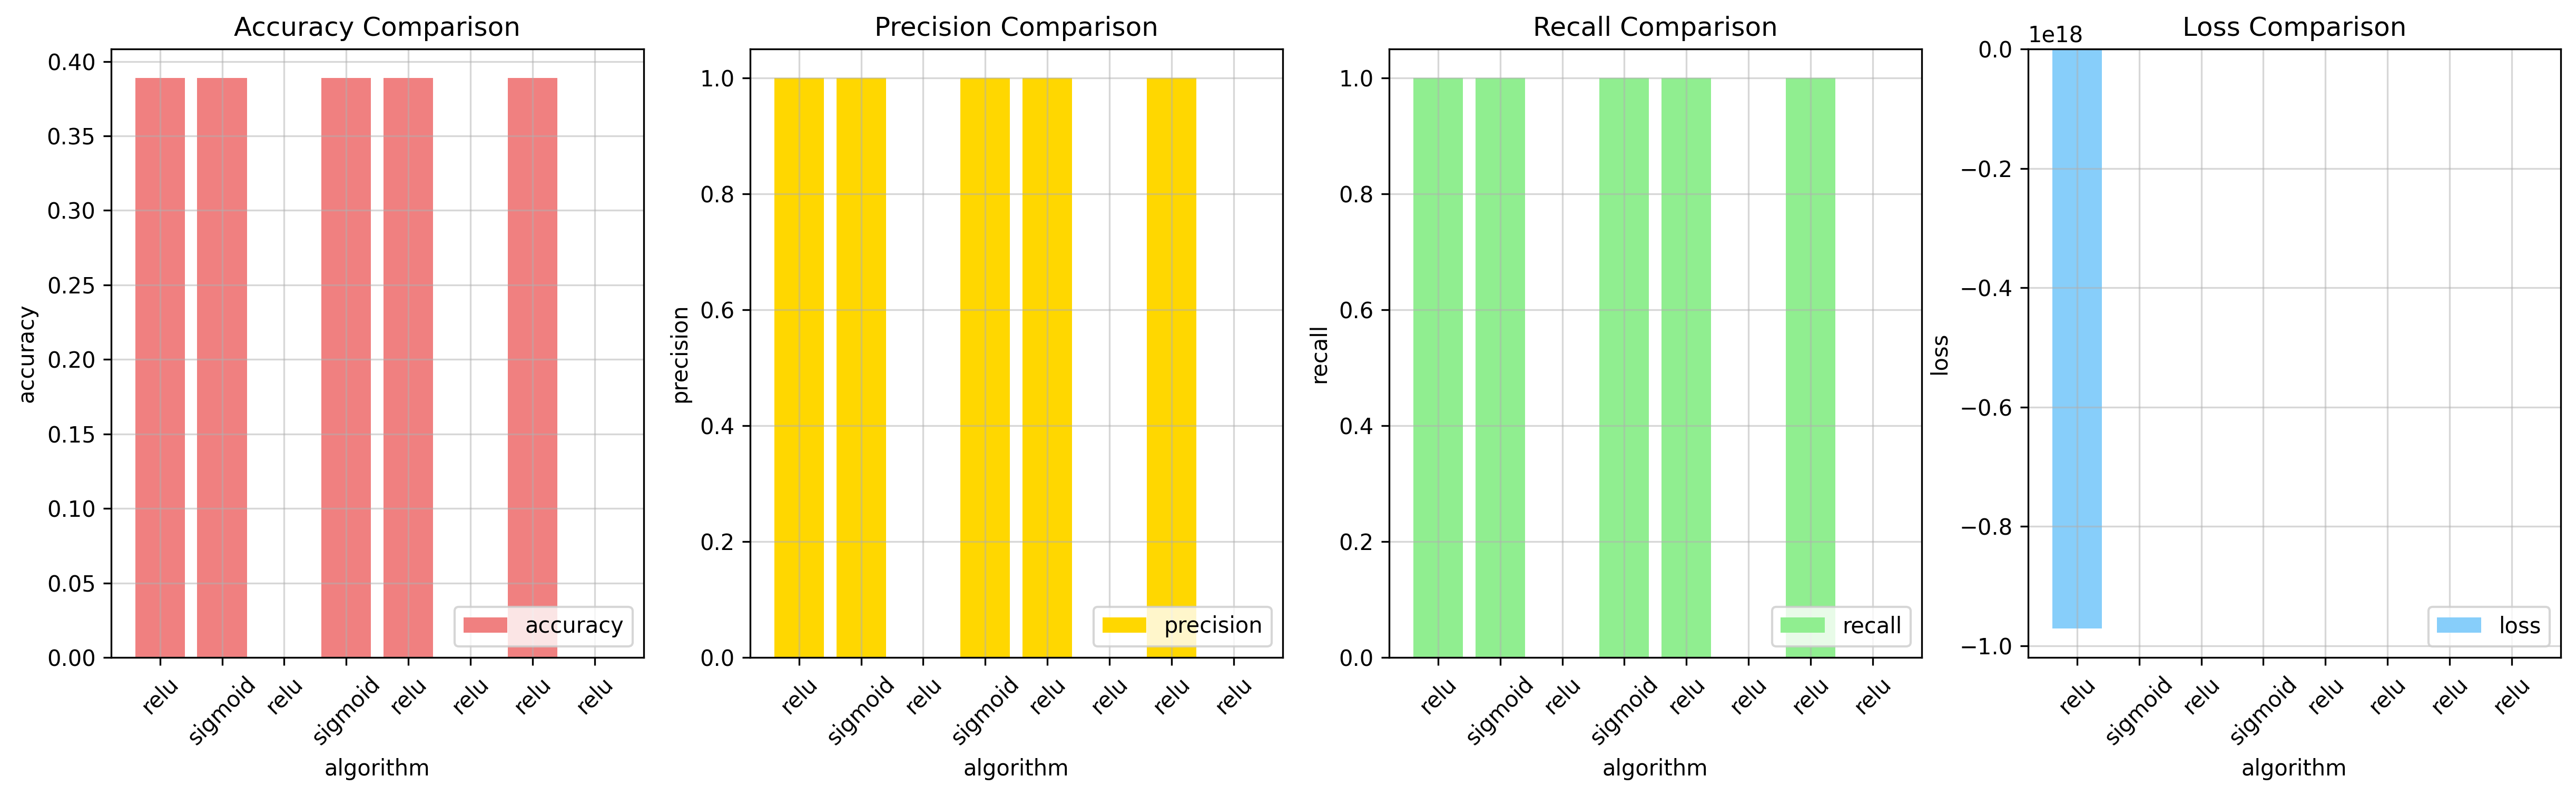

In [31]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = model_results['activation']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,model_results['accuracy'],color="lightcoral",alpha=1,label="accuracy") 
ax[0].grid(True,alpha=0.5)
# ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,model_results['precision'],color="gold",alpha=1,label="precision") 
ax[1].grid(True,alpha=0.5)
# ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,model_results['recall'],color="lightgreen",alpha=1,label="recall") 
ax[2].grid(True,alpha=0.5)
# ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,model_results['loss'],color="lightskyblue",alpha=1,label="loss") 
ax[3].grid(True,alpha=0.5)
# ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("loss")
ax[3].set_title("Loss Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)